In [1]:
# !pip install tensorflow==2.10.0
# !pip install scikit-learn==1.3.2
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2

# ANN Secuencial

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el dataset
data = load_diabetes()
X = data.data
y = data.target

In [4]:
# Escalamiento de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)  # Ajustar la forma de y

In [5]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Definir el modelo secuencial
model_seq = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Capa de salida
])

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilar el modelo
model_seq.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [9]:
# Entrenar el modelo
model_seq.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 28079.7188 - mae: 149.6018 - val_loss: 26176.0273 - val_mae: 144.4767
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28183.4160 - mae: 149.7843 - val_loss: 25526.6484 - val_mae: 142.2305
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28592.1934 - mae: 150.9299 - val_loss: 24438.8203 - val_mae: 138.4765
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27298.2676 - mae: 145.2285 - val_loss: 22647.3555 - val_mae: 132.3521
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25519.8164 - mae: 140.4959 - val_loss: 19983.1758 - val_mae: 122.8164
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20288.5781 - mae: 122.0515 - val_loss: 16450.5078 - val_mae: 109.2154
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18070.8340 - mae: 113.8216 - val_loss: 12394.4297 - val_mae: 91.7295
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14128.9932 - mae: 96.6522 - val_loss: 

In [10]:
# Evaluación del modelo
loss, mae = model_seq.evaluate(X_test, y_test)
print(f"Secuencial - MAE en test: {mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2928.3186 - mae: 44.1616
Secuencial - MAE en test: 42.69404602050781


# ANN Funcional

In [11]:
# Definir el modelo funcional
input_layer = keras.Input(shape=(X.shape[1],))
hidden_1 = layers.Dense(64, activation="relu")(input_layer)
hidden_2 = layers.Dense(32, activation="relu")(hidden_1)
output_layer = layers.Dense(1)(hidden_2)

In [12]:
# Crear el modelo
model_func = keras.Model(inputs=input_layer, outputs=output_layer)

In [13]:
model_func.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilar el modelo
model_func.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [15]:
# Entrenar el modelo
model_func.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 29430.7148 - mae: 154.8846 - val_loss: 26196.7832 - val_mae: 144.5283
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29219.0352 - mae: 151.6932 - val_loss: 25589.8535 - val_mae: 142.3764
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29890.7656 - mae: 153.3375 - val_loss: 24568.6738 - val_mae: 138.7944
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27140.4766 - mae: 144.6487 - val_loss: 22848.2148 - val_mae: 132.7729
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24842.4531 - mae: 137.3876 - val_loss: 20209.2754 - val_mae: 123.3367
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23757.6250 - mae: 133.2854 - val_loss: 16626.2051 - val_mae: 109.9005
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18094.5742 - mae: 113.9632 - val_loss: 12500.0068 - val_mae: 92.6685
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11868.5625 - mae: 88.8059 - val_loss: 

In [16]:
# Evaluación del modelo
loss, mae = model_func.evaluate(X_test, y_test)
print(f"Funcional - MAE en test: {mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2892.4028 - mae: 43.2475
Funcional - MAE en test: 42.09458541870117


# CNN

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [18]:
# 1. Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

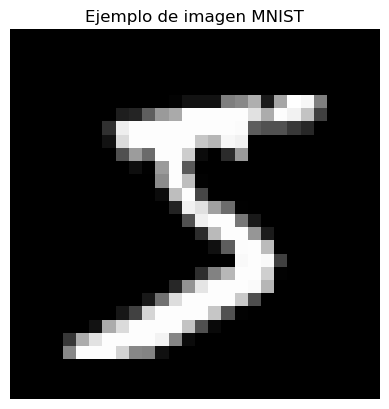

In [19]:
# Visualización de una imagen del dataset
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title("Ejemplo de imagen MNIST")
plt.axis("off")
plt.show()

In [20]:
# 2. Normalización y reestructuración de los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [21]:
print("-"*50)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("-"*50)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("-"*50)

--------------------------------------------------
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
--------------------------------------------------
y_train shape: (60000,)
y_test shape: (10000,)
--------------------------------------------------


In [22]:
# 3. Preparar los datos para la red neuronal
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [23]:
# Convertir las etiquetas en one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
# 3. Definir la arquitectura de la CNN
model = models.Sequential()
# Primera convolución + MaxPooling
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# Segunda convolución + MaxPooling
model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# Aplanamiento
model.add(layers.Flatten())
# Capa totalmente conectada
model.add(layers.Dense(units=1024, activation='relu'))
# Capa de dropout para evitar overfitting
model.add(layers.Dropout(rate=0.5))
# Capa de salida con 10 neuronas para las 10 clases de MNIST
model.add(layers.Dense(units=10, activation='softmax'))

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# 4. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# 5. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.9055 - loss: 0.2924 - val_accuracy: 0.9886 - val_loss: 0.0325
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9866 - loss: 0.0435 - val_accuracy: 0.9918 - val_loss: 0.0254
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9899 - val_loss: 0.0295
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.9935 - val_loss: 0.0227
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9934 - val_loss: 0.0260
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9942 - val_loss: 0.0224
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9970 - loss: 0.0092 - 

In [27]:
# 6. Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9915 - loss: 0.0357
Accuracy en test: 0.9926999807357788


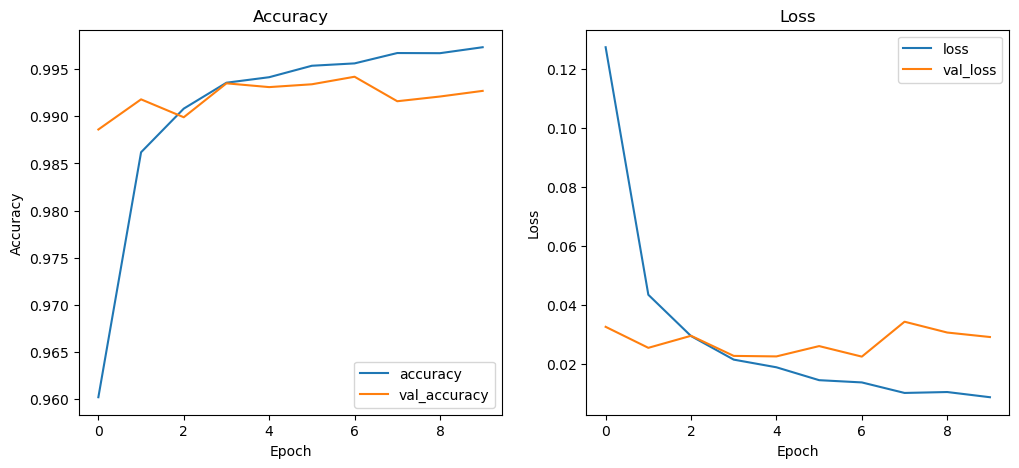

In [28]:
# 7. Visualizar la precisión y la pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# CNN a color

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [30]:
# 1. Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


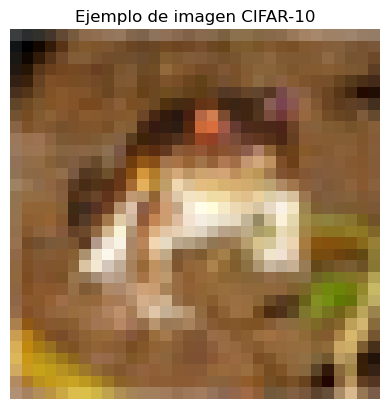

In [31]:
# 7. Visualización de una imagen del dataset
plt.imshow(X_train[0])
plt.title("Ejemplo de imagen CIFAR-10")
plt.axis("off")
plt.show()

In [32]:
# 2. Normalización de los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [33]:
# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [34]:
# 3. Definir la arquitectura de la CNN
drop_prob = 0.7  # Probabilidad de dropout
model = models.Sequential()
# Primera convolución + MaxPooling
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# Segunda convolución + MaxPooling
model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# Aplanamiento
model.add(layers.Flatten())
# Capa totalmente conectada
model.add(layers.Dense(units=1024, activation='relu'))
# Capa de dropout para regularizar
model.add(layers.Dropout(rate=drop_prob))
# Capa de salida con 10 neuronas para las 10 clases de CIFAR-10
model.add(layers.Dense(units=10, activation='softmax'))

In [46]:
# 4. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 5. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.8242 - loss: 0.5071 - val_accuracy: 0.7293 - val_loss: 0.8521
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.8391 - loss: 0.4600 - val_accuracy: 0.7304 - val_loss: 0.8722
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8544 - loss: 0.4169 - val_accuracy: 0.7302 - val_loss: 0.9029
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8644 - loss: 0.3864 - val_accuracy: 0.7274 - val_loss: 0.9428
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8673 - loss: 0.3752 - val_accuracy: 0.7279 - val_loss: 0.9487
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8752 - loss: 0.3486 - val_accuracy: 0.7311 - val_loss: 0.9621
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8820 - loss: 0.3353 - val_accuracy: 0.7388 - val_loss: 0.9633
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8934 - loss: 0.3012 - 

In [48]:
# 6. Evaluar el modelo en test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7380 - loss: 1.0500
Precisión en test: 0.7360


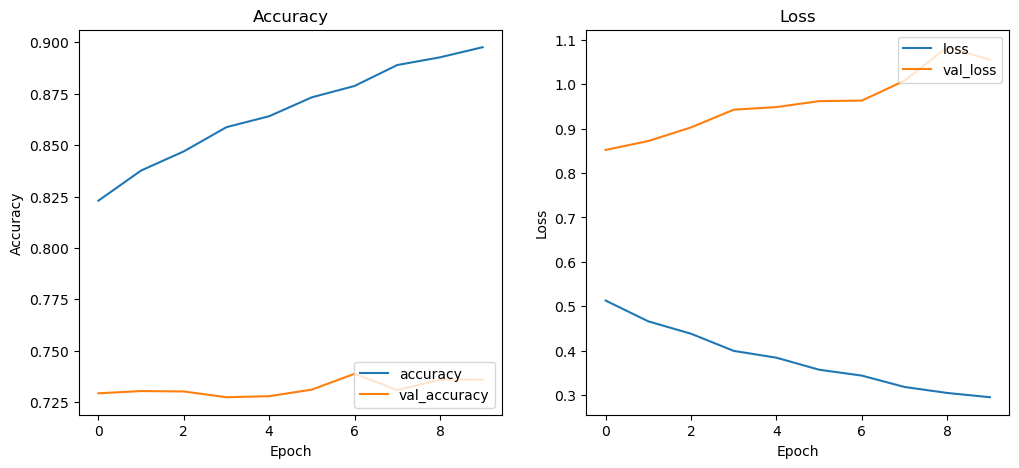

In [49]:
# 7. Visualizar la precisión y la pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()